# **LAB 01: TRỰC QUAN HÓA DỮ LIỆU VỚI PYTHON**
#### Môn học: Trực quan hóa dữ liệu
#### Nhóm: 5


## **A. Thu thập dữ liệu**

Đối với một doanh nghiệp, một trong những yếu tố cốt lõi để cấu thành nên sự thành công đó chính là khách hàng. Doanh nghiệp không bán sản phẩm họ cung cấp, mà họ bán sản phẩm mà người khác cần. Thật khó để một doanh nghiệp có thể duy trì nếu họ không có hoặc mất đi những khách hàng của chính họ. Vậy làm thế nào để một doanh nghiệp có thể thu hút ngày càng nhiều khách hàng cũng như đồng thời giữ được những người trung thành, đặc biệt là trong một thị trường đòi hỏi nhiều hơn là chỉ bán dịch vụ và sản phẩm đơn thuần. Chính vì thế, việc tìm hiểu và phân tích nhu cầu khách hàng chính là một trong những việc làm quan trọng, một bài toàn toán khó cho các doanh nghiệp hiện nay.

Thấy được tầm quan trọng của việc phân tích khách hàng, nhóm 5 lựa chọn bộ dữ liệu *Shop Customer Data* cho lab 01. Bộ dữ liệu được chia sẻ miễn phí trên nền tảng Kaggle. (Link dataset: https://www.kaggle.com/datasets/datascientistanna/customers-dataset)

License: <a href="http://opendatacommons.org/licenses/dbcl/1.0/">Database: Open Database, Contents: Database Contents</a>


Bộ dữ liệu được thu thập thủ công. Phương pháp thu thâp là thu thập thông qua nghiên cứu kéo dài 1 năm về khách hàng của các cửa hàng địa phương.


## **B. Khám phá dữ liệu**

### **Import các thư viện**

In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt

%matplotlib inline  
py.init_notebook_mode(connected=True)

### **Đọc file dữ liệu vào dataframe**

In [4]:
df=pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


### **Tiền xử lý và khám phá dữ liệu**

**Số dòng** và **số cột** của bộ dữ liệu: 2000 dòng, 8 cột

In [5]:
num_rows, num_cols = df.shape
print("Num rows: ", num_rows)
print("Num cols: ", num_cols)

Num rows:  2000
Num cols:  8


**Ý nghĩa của mỗi dòng**: Thông tin của một khách hàng mua sắm ở cửa hàng. Không có dòng nào mang ý nghĩa khác. 

In [6]:
df.head(1)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4


Kiểm tra xem có dòng nào bị trùng lặp hay không:

In [7]:
df.duplicated().sum()

0

**Ý nghĩa của mỗi cột**: 

- `Customer ID`: ID khách hàng
- `Gender`: Giới tính
- `Age`: Tuổi
- `Annual Income`: Thu nhập hàng năm (đơn vị: $)
- `Spending Score`: Điểm do cửa hàng chấm, dựa trên hành vi và tính chất chi tiêu của khách hàng. Nằm trong khoảng [0,100]
- `Profession`: Nghề nghiệp
- `Work Experience`: Kinh nghiệm làm việc (đơn vị: năm)
- `Family Size`: Số thành viên trong gia đình

Ta sẽ thực hiện chuẩn hóa tên các cột để thuận tiện hơn cho việc sử dụng về sau:

In [8]:
df = df.rename(columns={'Annual Income ($)': 'Annual_Income',
                        'Spending Score (1-100)': 'Spending_Score',
                        'Work Experience':'Work_Experience',
                        'Family Size':'Family_Size'})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score',
       'Profession', 'Work_Experience', 'Family_Size'],
      dtype='object')

**Kiểu dữ liệu của mỗi cột:**

In [9]:
df.dtypes

CustomerID          int64
Gender             object
Age                 int64
Annual_Income       int64
Spending_Score      int64
Profession         object
Work_Experience     int64
Family_Size         int64
dtype: object

Các cột đều có kiểu dữ liệu phù hợp, không cần xử lý.

**Kiểm tra giá trị bị thiếu:**

In [10]:
df.isna().sum()

CustomerID          0
Gender              0
Age                 0
Annual_Income       0
Spending_Score      0
Profession         35
Work_Experience     0
Family_Size         0
dtype: int64

Có 35 giá trị thiếu ở cột `Profession`.

**Phân bố giá trị của các cột numeric:**

Dựa vào việc kiểm tra kiểu dữ liệu của các cột ở bước trên, ta đang có 6 cột có vẻ thuộc nhóm **numeric** là: `CustomerID`, `Age`, `Annual_Income`, `Spending_Score`, `Work_Experience`, `Family_Size`. Tuy nhiên, cột `CustomerID` thật ra lại là dạng **categorical** (vì ID là mã được đánh dưới dạng 

Bảng thống kê cơ bản về các phân bố giá trị của các thuộc tính **numeric**:

In [11]:
df[['Age', 'Annual_Income', 'Spending_Score', 'Work_Experience', 'Family_Size']].describe()

,Age,Annual_Income,Spending_Score,Work_Experience,Family_Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


Nhìn tổng quan, khách hàng có tuổi nhỏ nhất là 0. Ta thử truy vấn:

In [12]:
df[df["Age"]==0]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
333,334,Male,0,173743,96,Artist,0,4
440,441,Female,0,57373,29,NaN,0,7
443,444,Female,0,68761,16,Lawyer,1,4
466,467,Male,0,186002,80,Doctor,15,2
559,560,Male,0,151298,89,Artist,0,6
562,563,Female,0,142892,25,Entertainment,8,1
767,768,Female,0,143910,22,Marketing,1,7
794,795,Female,0,147719,86,Lawyer,1,7


Có vẻ như người thu thập đã điền giá trị 0 cho các khách hàng không có thông tin về độ tuổi. Ta sẽ thực hiện 

**Phân bố giá trị của các cột categorical:**

Có 3 cột thuộc nhóm **categorical** là: `CustomerID`, `Gender`, `Profession`

Kiểm tra số giá trị trùng lặp ở cột `CustomerID`:

In [13]:
df["CustomerID"].duplicated().sum()

0

Mỗi ID khách hàng là duy nhất, không có sự trùng lặp

Bỏ qua thuộc tính `CustomerID`, ta có bảng thống kê cơ bản về các phân bố giá trị của các thuộc tính **categorical** còn lại:

In [14]:
df[['Gender','Profession']].describe()

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


**Làm sạch dữ liệu:**

Ta lần lượt đi kiểm tra giá trị trong từng cột dữ liệu và tiền xử lý (nếu cần)

**Cột `CustomerID`**: Dựa vào kết quả kiểm tra các bước ở trên, các giá trị ở cột `CustomerID` đều khác nhau nên không có vấn đề gì cần tiền xử lý.

**Cột `Gender`**:

<AxesSubplot:xlabel='Gender', ylabel='count'>

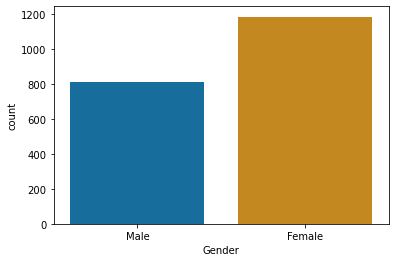

In [15]:
sns.countplot(x='Gender', data=df,palette="colorblind")

**Cột `Age`**:

In [16]:
fig = px.box(df, x="Age",width=800, height=400)
fig.show()

Phân bố của độ tuổi khá đẹp. Ta sẽ thực hiện thay thế những khách hàng có độ tuổi 0 giá trị trung vị các khách hàng có độ tuổi khác 0 để bộ dữ liệu hợp lý hơn: 

In [17]:
df.loc[df["Age"]==0,"Age"]=int(df[df["Age"]>0]["Age"].median())

**Cột `Annual_Income`**:

In [18]:
fig = px.box(df,x='Annual_Income',width=800, height=400)
fig.show()

In [19]:
fig = px.box(df, y="Annual_Income",x='Age')
fig.show()

Nhìn chung thì có một vài outliers, có thể đây là những trường hợp cá biệt nên ta sẽ không xử lý.

**Cột `Spending_Score`**: là cột do chủ cửa hàng điền, ta sẽ bàn luận sâu hơn khi thực hiện phân tích rõ mối quan hệ các thuộc tính.

**Cột `Profession`**:

<AxesSubplot:xlabel='Profession', ylabel='count'>

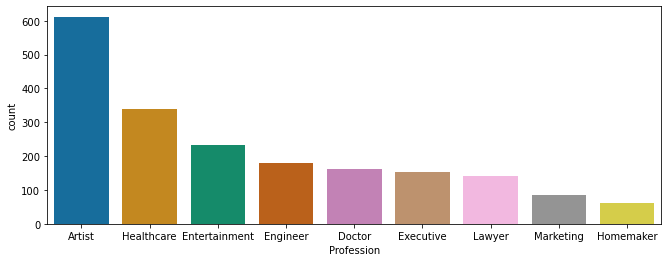

In [20]:
plt.figure(figsize=(11,4))
sns.countplot(x='Profession', data=df,palette="colorblind",order = df['Profession'].value_counts().index)

Điền các giá trị bị thiếu trong cột `Profession` bằng giá trị mới là "other". Việc điền bằng một giá trị mới thay vì dùng các giá trị hiện có sẽ giúp không làm thay đổi nhiều phân bố của các giá trị cũ. Ngoài ra dùng giá trị là 'other', ta không cần train lại mô hình học máy nếu có xuất hiện thêm một vài giá trị `Profession` mới nào khác trong tương lai.

In [21]:
df['Profession'] = df['Profession'].fillna('other')
df['Profession'].isna().sum()

0

<AxesSubplot:xlabel='Profession', ylabel='count'>

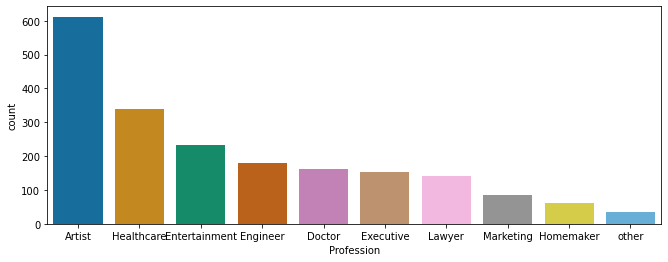

In [22]:
plt.figure(figsize=(11,4))
sns.countplot(x='Profession', data=df,palette="colorblind",order = df['Profession'].value_counts().index)

**Cột `Work_Experience`**:

In [23]:
fig = px.box(df, x="Work_Experience",width=800, height=400)
fig.show()

Nhìn vào đồ thị, ta thấy `Work_Experience` có một giá trị outlier là 17. Thực hiện truy vấn những dòng này:

In [24]:
df[df['Work_Experience'] == 17]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
392,393,Male,21,119116,30,Artist,17,4
405,406,Female,65,119889,11,Artist,17,6
473,474,Male,20,130813,92,Artist,17,5
566,567,Female,19,180331,14,Artist,17,5
603,604,Female,91,69720,78,Lawyer,17,6


Với `Profession` là _"Artist"_ thì nhìn chung những outlier vẫn khá hợp lý nên ta sẽ giữ lại 5 dòng này.

In [25]:
fig = px.box(df, y="Work_Experience",x='Age')
fig.show()

Có khá nhiều outliers khi ta trực quan hóa kết hợp với cột `Age`, nhìn vào các outliers ta nhận ra một vài vấn đề sai về dữ liệu như như 8 tuổi có 14 năm kinh nghiệm, 19 tuổi có 17 năm kinh nghiệm,...

In [26]:
df[df['Work_Experience'] - df['Age'] >= 0]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
210,211,Female,1,57000,93,Engineer,1,2
230,231,Female,6,93000,53,Lawyer,8,2
234,235,Female,4,84000,54,Artist,9,1
321,322,Male,5,69078,60,Lawyer,13,1
338,339,Female,7,123804,28,Doctor,14,1
...,...,...,...,...,...,...,...,...
1923,1924,Male,2,101718,11,Executive,8,3
1926,1927,Male,3,74607,69,Healthcare,6,1
1951,1952,Male,1,57522,75,Artist,10,5
1984,1985,Female,2,153622,51,Lawyer,6,6


Ta sẽ loại bỏ những dòng có `Work_Experience` lớn hơn `Age`:

In [27]:
df = df.drop(df[df['Work_Experience'] - df['Age'] >= 0].index)

**Cột `Family_Size`:**

In [28]:
fig = px.box(df, x="Family_Size",width=800, height=400)
fig.show()

Dataframe sau khi thực hiện tiền xử lý:

In [29]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


#### **C. Khám phá mối quan hệ trong dữ liệu**

Dùng chung `df` để đỡ phải sửa khi merge nha

<AxesSubplot:xlabel='Profession', ylabel='Work_Experience'>

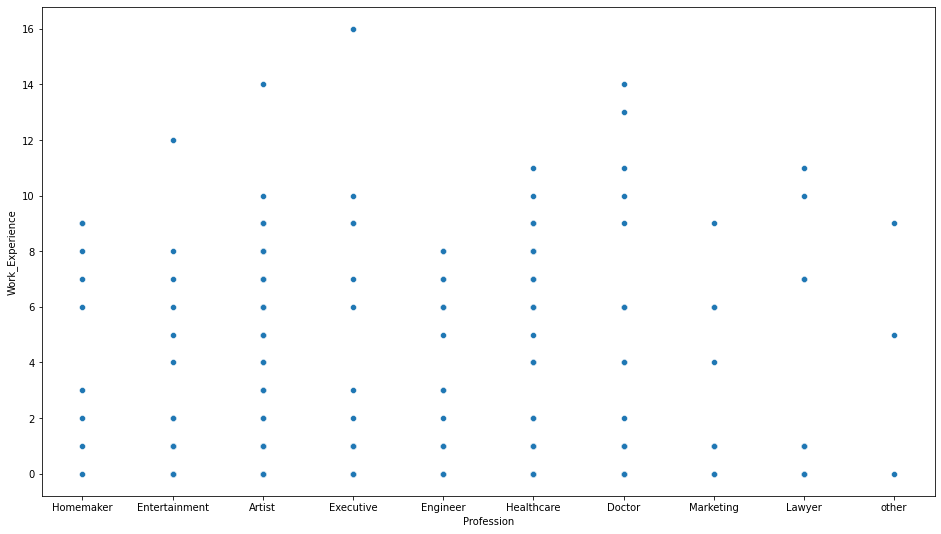

In [30]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df[df.Age <= 18], x="Profession", y="Work_Experience")

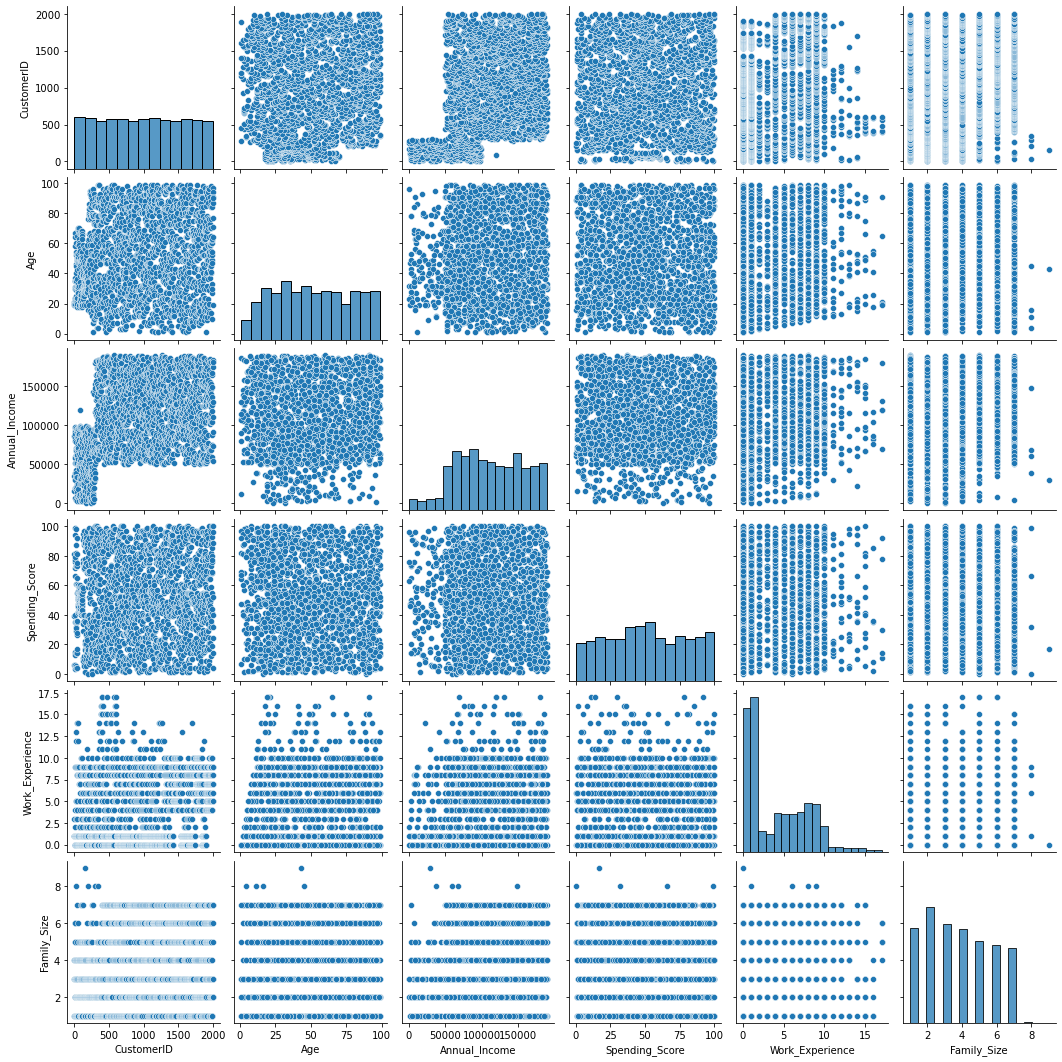

In [31]:
sns.pairplot(data=df)

**Mối Quan Hệ Giữa 2 Thuộc Tính: `Profession` và `Spending_Score`**

Với mối quan hệ giữa hai thuộc tính `Profession` và `Spending_Score`, ta không thể sử dụng biểu đồ scatter plot để trực quan hóa được mối tương quan giữa hai thuộc tính này vì **Profession** là một thuộc tính phân loại (categorical) trong khi **Spending_Score** là một thuộc tính định lượng (quantitative).

Chúng ta có thể sử dụng biểu đồ boxplot để trực quan hóa mối quan hệ giữa hai thuộc tính **Profession** và **Spending_Score**. Biểu đồ boxplot sẽ hiển thị phân bố của "Spending_Score" theo từng nhóm "Profession".

In [32]:
def box_sta(data):
    
    quantiles = data.quantile([0.25, 0.75]).values.tolist() # Separação dos quantiles.
    LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5)
    LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5)
    if LI < data.min():
        LI = data.min()
    if LS > data.max():
        LS = data.max()
    return quantiles, [LI,LS]

In [33]:
def plot_spending_score_vs_profession():
    dt = df[['Spending_Score', 'Profession']].fillna('No Register')
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x='Spending_Score', y='Profession', data=dt, width=0.5, palette='Blues_r',
                boxprops={"edgecolor": "grey", "linewidth": 0.5},
                medianprops={"color": "grey", "linewidth": 0.5},
                capprops={"color": "grey", "linewidth": 0.3},
                whiskerprops={"color": "grey", "linewidth": 0.3},
                flierprops={"marker": "x", "markersize": 3})
    pos = range(dt['Profession'].nunique())
    for i, p in zip(pos, dt['Profession'].unique()):
        quantiles, limits = box_sta(dt.loc[dt['Profession'] == p, 'Spending_Score'])
        ax.annotate(f"{limits[0]:.1f}", xy=(limits[0], i+0.2), fontsize=8, color='black', horizontalalignment='center', verticalalignment='center')
        ax.annotate(f"{limits[1]:.1f}", xy=(limits[1], i+0.2), fontsize=8, color='black', horizontalalignment='center', verticalalignment='center')
        ax.annotate(f"{quantiles[0]:.1f}", xy=(quantiles[0], i-0.2), fontsize=8, color='black', horizontalalignment='center', verticalalignment='center')
        ax.annotate(f"{quantiles[1]:.1f}", xy=(quantiles[1], i-0.2), fontsize=8, color='black', horizontalalignment='center', verticalalignment='center')

    ax.set_xlabel('Spending Score Range', fontsize=12, color='dimgrey')
    ax.set_ylabel('Profession', fontsize=12, color='dimgrey')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('darkgrey')
    ax.spines['bottom'].set_color('darkgrey')
    ax.tick_params(axis='y', colors='black')
    ax.tick_params(axis='x', colors='grey')
    plt.title('Spending Score vs Profession', fontsize=15, color='dimgrey', y=1.05)
    plt.show()


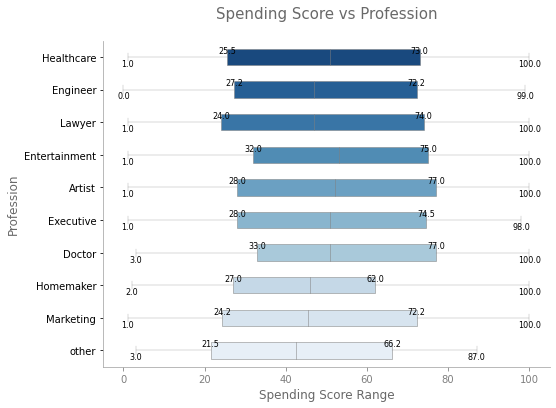

In [34]:
plot_spending_score_vs_profession()

Từ biểu đồ boxplot trên, ta có thể rút ra các nhận xét sau:

- Nhóm Profession Doctor và Artist có mức độ chi tiêu trung bình cao nhất, được thể hiện bởi khoảng cách giữa Q1 và Q3 (IQR) của Spending_Score tương đối lớn.
- Nhóm Profession Marketing và Lawyer có phân tán giá trị của Spending_Score lớn nhất cho thấy sự đa dạng về mức độ chi tiêu của các khách hàng trong nhóm này.
- Nhóm Profession Homemaker có mức độ chi tiêu trung bình thấp nhất, được thể hiện bởi giá trị IQR của Spending_Score tương đối thấp so với các nhóm khác.

Từ đó, ta có thể rút ra kết luận rằng Profession và Spending_Score có mối quan hệ. Cụ thể, các nhóm khách hàng thuộc các ngành nghề khác nhau có xu hướng chi tiêu khác nhau. Tuy nhiên, việc chi tiêu của khách hàng không hoàn toàn phụ thuộc vào nghề nghiệp của họ và còn phụ thuộc vào nhiều yếu tố khác như thu nhập, độ tuổi, v.v... Do đó, để đánh giá chính xác hơn về mối quan hệ giữa hai thuộc tính này, cần phải tiến hành thêm các phân tích thống kê và đánh giá sự ảnh hưởng của các yếu tố khác đến mức độ chi tiêu của khách hàng.

**Profession** và **Spending_Score** là hai thuộc tính dạng `categorical` và `numeric`, để xác định tính đáng kể của sự khác biệt giữa các nhóm Profession trên giá trị của biến numeric Spending_Score, chúng ta có thể sử dụng phương pháp ANOVA.

In [35]:

import scipy.stats as stats
# Để sử dụng ANOVA cho Profession và Spending-Score, trước hết ta cần phải chuyển đổi thuộc tính Spending-Score thành dạng categorical. 
# Ta có thể chia dữ liệu Spending-Score thành các khoảng (bin) và gán nhãn cho mỗi khoảng đó.
# Chia dữ liệu Spending_Score thành 5 khoảng và gán nhãn cho mỗi khoảng
bins = pd.IntervalIndex.from_tuples([(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)], closed='left')
df['Spending_Score_Cat'] = pd.cut(df['Spending_Score'], bins=bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

# Tính toán kết quả ANOVA
result = stats.f_oneway(*(group['Spending_Score_Cat'].cat.codes.values for name, group in df.groupby('Profession')))
print(result)


F_onewayResult(statistic=1.0782006422164223, pvalue=0.3755704427367188)


Kết quả của F-test (hay F-statistic) trong ANOVA là 1.0212341876611486 và p-value là 0.42028666211926147, thì chúng ta có thể đưa ra các nhận xét sau:

- Giá trị F-statistic cho biết sự khác biệt giữa các nhóm (các nghề nghiệp) có mức độ chi tiêu khác nhau là nhỏ (độ lớn của hiệu quả giữa các nhóm không cao).
- Giá trị p-value > 0.05, tức là không đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt đáng kể giữa các nhóm. Do đó, chúng ta không thể kết luận rằng sự khác biệt giữa các nhóm (các nghề nghiệp) trong mức độ chi tiêu là đáng kể.

Vì vậy, từ kết quả này, chúng ta có thể suy ra rằng không có sự khác biệt đáng kể giữa các nhóm trong mức độ chi tiêu và giá trị này có thể được giải thích bằng sự ngẫu nhiên.

### Mối quan hệ thuộc tính `Gender` và `Spending_Score`

In [36]:
def gender_Spendingscore():
    figura = plt.figure(figsize=(8,5))
    dt = df.copy()
    size = (1,1)
    c = 0
    plt.subplots_adjust(hspace=0.5,
                        wspace=0.7)
    plt.suptitle('Correlation Between Spending Score and Gender', y=1.1, fontsize=15, color='dimgrey')

    # =============== Box ===============
    col = 'Gender'
    pos = (0,0)
    ax = plt.subplot2grid(size, pos,colspan=1)
    box = sns.boxplot(x = dt['Spending_Score'], y = dt[col].astype(str), 
                          ax=ax, width = 0.5,palette="Blues_r",
                          boxprops= { "edgecolor": "grey", "linewidth": 0.5},
                          medianprops={"color": "grey", "linewidth": 0.5},
                          capprops={"color": "grey", "linewidth": 0.3},
                          whiskerprops={"color": "grey", "linewidth": 0.3},
                          flierprops={ "marker": "x", "markersize":3})

    for var, po in zip(dt[col].unique(), range(dt[col].nunique())):

        quantiles,limits =  box_sta(dt.loc[dt[col] == var, 'Spending_Score'])
        for i in quantiles:
            box.annotate(int(i), xy=(i+0.20, po- 0.30 ), fontsize=10, color='black',  horizontalalignment='center')
        for i in limits:
            box.annotate(i, xy=(i+0.1, po + 0.30), fontsize=10, color='black', horizontalalignment='center')
    plt.title(f"Spending Score x {col.replace('_',' ')}", x=0, horizontalalignment='left',verticalalignment='bottom',
              color='grey', fontsize=12, y=1.1)

    box.spines['top'].set_visible(False)
    box.spines['right'].set_visible(False)
    # Definir Cor das Barras de eixo.
    box.spines['left'].set_color('darkgrey')
    box.spines['bottom'].set_color('darkgrey'),
    # Parâmetros do tick.
    box.tick_params(axis='y', colors='black')
    box.tick_params(axis='x', colors='grey')
    #box.set(xlabel='', ylabel='Count')
    box.yaxis.label.set_color('darkgrey')  
    box.set_xlabel('Spending Score Range', horizontalalignment='right', fontsize=10, color='dimgrey', x=1)       
    box.set_ylabel(f'{col}', horizontalalignment='center', fontsize=10, color='dimgrey',verticalalignment='bottom')        
    return plt.show()

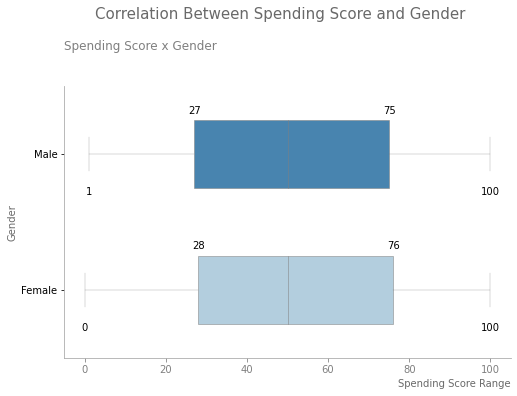

In [37]:
gender_Spendingscore()

Dựa trên biểu đồ boxplot của Gender và Spending_Score từ dataset, ta có thể rút ra các nhận xét sau:

- Giá trị trung bình của Spending_Score là khá tương đồng giữa cả hai giới tính, khoảng từ 50 đến 60.
- Đối với khách hàng nữ (Gender = Female), thì khoảng giá trị Spending_Score của họ có xu hướng lớn hơn so với khách hàng nam (Gender = Male), cụ thể là ở khoảng giá trị trung vị (median) và khoảng giá trị ở phần upper quartile (Q3) của biểu đồ. Điều này có thể là do nữ giới có xu hướng chi tiêu nhiều hơn trong các giao dịch mua sắm.
- Cả hai giới tính đều có một số khách hàng Spending_Score rất cao, vượt quá giá trị trung bình. Tuy nhiên, đối với nữ giới, phân bố của Spending_Score ở mức này có xu hướng rộng hơn so với nam giới.

Tuy nhiên, cần lưu ý rằng không phải tất cả các nữ khách hàng đều chi tiêu nhiều hơn nam khách hàng, vì vậy không nên kết luận rằng giới tính là yếu tố định lượng quan trọng nhất trong việc dự đoán mức độ chi tiêu của khách hàng.

Tính độ tương quan giữa Gender và Spending_Score

Tuy nhiên, Gender hiện đang ở dạng categorical, ta sẽ chuyển đổi sang thành Binary để dễ dàng hơn cho việc tính độ tương quan

In [42]:
from scipy.stats import pointbiserialr

# Đọc dữ liệu từ file csv
data = df.copy()

# Chuyển đổi thuộc tính Gender thành binary
data['Gender'] = np.where(data['Gender'] == 'Female', 0, 1)

# Tính toán correlation coefficient
corr, p_value = pointbiserialr(data['Gender'], data['Spending_Score'])

# In kết quả
print('Correlation coefficient:', corr)
print('p-value:', p_value)

Correlation coefficient: -0.007460896715890085
p-value: 0.7438859055767515


Kết quả trả về cho thấy giữa thuộc tính Gender và Spending Score không có mối tương quan đáng kể (correlation coefficient gần bằng 0 và p-value lớn hơn 0.05). Điều này có thể giải thích bằng việc Spending Score của mỗi khách hàng phụ thuộc vào nhiều yếu tố khác nhau ngoài giới tính. Do đó, Gender có thể không phải là yếu tố quyết định đáng kể trong việc ảnh hưởng đến Spending Score của mỗi khách hàng.

#### Kiểm tra sự khác biệt của ba thuộc tính Gender, Profession và Spending_Score

Gender và Profession đều thuộc loại categorical còn Spending Score là thuộc tính numeric. Ta sẽ sử dụng **ANOVA** để kiểm tra sự khác biệt giữa các nhóm trên một biến định lượng (numeric) dựa trên các nhóm thuộc tính (categorical) khác nhau. 

`ANOVA (Analysis of Variance)` là phương pháp thống kê được sử dụng để so sánh sự khác biệt giữa các trung bình của các nhóm. Những nhóm này có thể là nhóm dữ liệu có thuộc tính dạng số (numeric) hoặc có thuộc tính dạng nhóm (categorical).

Cụ thể, bước thực hiện ANOVA như sau:

B1: Tiền xử lý dữ liệu: Các thuộc tính Gender và Profession đã ở dạng categorical, ta không cần phải chuyển đổi. Các giá trị của thuộc tính Spending Score là numeric, ta sẽ giữ nguyên.

B2: Xác định các nhóm của các thuộc tính categorical:
- Gender: Male và Female
- Profession: Artist, Doctor, Engineer, Entertainment, Executive, Healthcare, Homemaker, Lawyer, Marketing, Other.

B3: Thực hiện kiểm định ANOVA: Ta có thể sử dụng một số thư viện như `statsmodels` trong Python để thực hiện kiểm định ANOVA.

B4: Đánh giá kết quả: ta chú ý vào thông số `PR(>F)` (Giá trị p-value) được tính dựa trên phân phối F và độ tự do của từng nhóm và Residual(Residual là sự khác biệt giữa giá trị quan sát thực tế và giá trị ước tính từ mô hình. Nó cho biết mức độ dao động của dữ liệu còn lại sau khi đã giải thích phần lớn sự biến động của dữ liệu bằng mô hình ANOVA). Giá trị p-value cho biết xác suất của giả thuyết H0: **Không có sự khác biệt đáng kể giữa các nhóm**, nếu giá trị p-value nhỏ hơn một ngưỡng xác định (thường là 0.05) thì ta bác bỏ giả thuyết này.

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Spending_Score ~ C(Gender) + C(Profession)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                     sum_sq      df         F    PR(>F)
C(Gender)      8.502492e+01     1.0  0.108510  0.741883
C(Profession)  7.373684e+03     9.0  1.045604  0.400802
Residual       1.495825e+06  1909.0       NaN       NaN


Với kết quả này,  giá trị `p-value` của **Gender** và **Profession** đều lớn hơn mức ý nghĩa (significance level) 0.05, cho thấy không có sự khác biệt đáng kể giữa các nhóm trong hai thuộc tính này đối với Spending Score và giả thuyết H0 không bị bác bỏ. 

Do đó, chúng ta không thể kết luận rằng Gender và Profession ảnh hưởng đến Spending Score.

Chúng ta sử dụng ANOVA để xem xét sự khác biệt giữa các nhóm trên ba biến số định lượng khác nhau (Profession, Gender và Spending-Score), và xem liệu có mối liên hệ giữa chúng không. 

Tuy nhiên, ANOVA chỉ cho chúng ta biết sự khác biệt giữa các nhóm, và không nói gì về mối liên hệ giữa các biến số.

#### **D. Xây dựng mô hình học máy**

Làm khi còn thời gian